# Arij Hraghi - Ahmed Gharsallah - Jihene Ben Takeya

# 1. Travail demandé
1- Pour chaque image de la base enregistrée dans bibimage.tar, calculer les points d’intérêts
en utilisant le détecteur de Harris et le détecteur SIFT.

2- Calculer les descripteurs associés en utilisant deux méthodes : Les invariants différentiels et
le descripteur SIFT.

3- Augmenter la base initiale en appliquant différents types de transformations (rotation,
translation, zoom, contraste, etc).

4- Calculer les matrices de similarités associées aux deux types de descripteurs et étudier leurs
robustesses vis-à-vis des transformations appliquées.


5- Faire le lien avec l’approche globale mise en œuvre lors de la première partie du projet.

# I. Construction d'un vecteur caractéristique par image

1-determiner les points d'interet par le detecteur de harris

2-calculer le descripteur SIFT pour chaque point d'interet (taille vecteur 128)
Le vecteur caracterisant une image sera la concatenation des descripteurs de chaque point d'interet
(128*nbre de point d'interet)
 

## 1-1 Calcul de points d'interet en utilisant le detecteur Harris


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

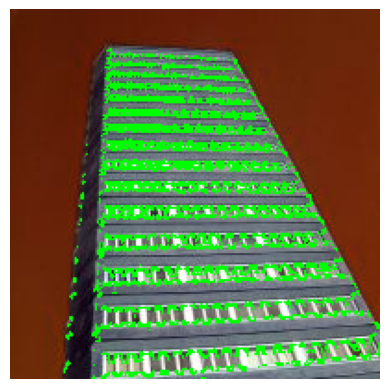

In [7]:


def harris_detector(image_path, k=0.04, threshold=0.001):
  
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Appliquer la détection des coins de Harris
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)

    img[corners > threshold * corners.max()] = [0,255,0]

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

img=harris_detector(r'C:\Users\Arij\Desktop\RT5\BE\21.jpg')


## 1-2 Calcul de points d'interet en utilisant le detecteur de SIFT

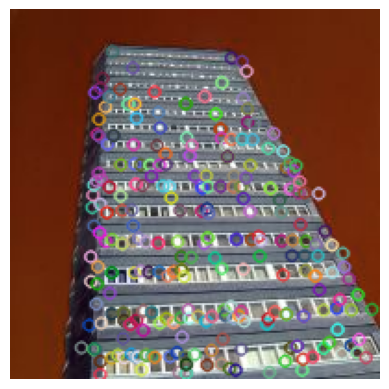

In [18]:

image_path = r'C:\Users\Arij\Desktop\RT5\BE\21.jpg'

def SIFT_DETECTOR(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return keypoints, descriptors
img = cv2.imread(image_path)
keypoints, descriptors=SIFT_DETECTOR(image_path)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img_with_keypoints)
plt.axis('off')
plt.show()

In [19]:
import cv2
import numpy as np
image_path = r'C:\Users\Arij\Desktop\RT5\BE\21.jpg'
def descripteur_SIFT(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    sift = cv2.SIFT_create()


    keypoints, descriptors = SIFT_DETECTOR(image_path)

    if descriptors is not None:

        print(f"Nombre total de points d'intérêt : {len(keypoints)}")


        expected_descriptor_size = 128

        feature_vector = np.concatenate(descriptors)


        if feature_vector.shape[0] == expected_descriptor_size * len(keypoints):
            print("Vecteur caractéristique créé avec succès.")
        else:
            print("Erreur : La taille du vecteur caractéristique ne correspond pas.")
    else:
        print("Aucun descripteur n'a été trouvé.")
    return feature_vector
feature_vector=descripteur_SIFT(image_path)

Nombre total de points d'intérêt : 309
Vecteur caractéristique créé avec succès.


## SIFT DESCRIPTOR

In [14]:

database = []  

folder = r"C:\Users\Arij\Desktop\RT5\BE"
for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    if os.path.isfile(img_path):
        descriptors = descripteur_SIFT(img_path)
        database.append((img_path, descriptors))


Nombre total de points d'intérêt : 610
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 775
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 698
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 902
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 146
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 52
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 61
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 319
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 266
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 696
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 763
Vecteur caractéristique créé avec succès.
Nombre total de points d'intérêt : 1035
Vecteur caractéristique créé avec succès.
Nombre total de points d'inté

In [75]:
import os
import cv2
from tqdm import tqdm
from albumentations import *

def augment_data(source, new_path, train):
    for image_name in os.listdir(source):
        if image_name.endswith('.jpg'):
            # Load the image
            img_path = os.path.join(source, image_name)
            img = cv2.imread(img_path)
            # Convert BGR to RGB
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Initialize a list to store augmented images
            augmented_images = [img]

            if train:
                # Define augmentation transforms for training data
                aug = Compose([
                    Transpose(p=1),
                    HorizontalFlip(p=1),
                    VerticalFlip(p=1),
                    Rotate(limit=45, p=1)
                ])

                # Apply augmentations to the original image
                for _ in range(4):  # Repeat the augmentations 4 times (adjust as needed)
                    augmented = aug(image=img)
                    augmented_images.append(augmented['image'])

            # Save the augmented images
            for index, augmented_image in tqdm(enumerate(augmented_images), desc=f"Augmenting {image_name}"):
                if train:
                    new_image_name = f"{image_name.split('.')[0]}_aug{index}.jpg"
                else:
                    new_image_name = f"{image_name}"
                new_image_path = os.path.join(new_path, new_image_name)
                cv2.imwrite(new_image_path, augmented_image)

    print("Done!")


In [76]:
source=r"C:\Users\Arij\Desktop\RT5\BE"
destination=r"C:\Users\Arij\Desktop\RT5\AUG_BE"
augment_data(source,destination,train=True)

Augmenting 01.jpg: 5it [00:00, 453.48it/s]
Augmenting 02.jpg: 5it [00:00, 384.74it/s]
Augmenting 03.jpg: 5it [00:00, 385.63it/s]
Augmenting 04.jpg: 5it [00:00, 384.64it/s]
Augmenting 05.jpg: 5it [00:00, 454.21it/s]
Augmenting 06.jpg: 5it [00:00, 415.76it/s]
Augmenting 07.jpg: 5it [00:00, 416.61it/s]
Augmenting 08.jpg: 5it [00:00, 417.48it/s]
Augmenting 09.jpg: 5it [00:00, 454.95it/s]
Augmenting 10.jpg: 5it [00:00, 454.06it/s]
Augmenting 11.jpg: 5it [00:00, 454.49it/s]
Augmenting 12.jpg: 5it [00:00, 454.61it/s]
Augmenting 13.jpg: 5it [00:00, 454.52it/s]
Augmenting 14.jpg: 5it [00:00, 499.31it/s]
Augmenting 15.jpg: 5it [00:00, 555.60it/s]
Augmenting 16.jpg: 5it [00:00, 627.78it/s]
Augmenting 17.jpg: 5it [00:00, 554.82it/s]
Augmenting 18.jpg: 5it [00:00, 500.18it/s]
Augmenting 19.jpg: 5it [00:00, 555.74it/s]
Augmenting 20.jpg: 5it [00:00, 500.10it/s]
Augmenting 21.jpg: 5it [00:00, 625.06it/s]
Augmenting 22.jpg: 5it [00:00, 500.12it/s]
Augmenting 23.jpg: 5it [00:00, 556.17it/s]
Augmenting 

Done!


Error: sorted_indices not defined.
Sorted Indices: [510 511 512]
Length of Image Paths: 2


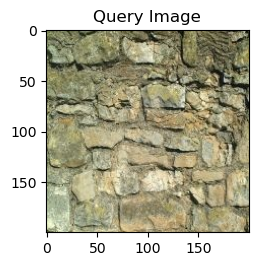

In [107]:
import os
import cv2
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def SIFT_DETECTOR(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

def calculate_distances(sift_a, sift_b):
    return cdist(sift_a, sift_b)

def identify_most_similar(distances):
    a_to_b = np.argmin(distances, axis=1)
    b_to_a = np.argmin(distances, axis=0)
    return a_to_b, b_to_a

def find_reciprocal_pairs(a_to_b, b_to_a):
    reciprocal_pairs = np.where(b_to_a[a_to_b] == np.arange(len(a_to_b)))[0]
    return reciprocal_pairs

def write_similarity_matrix(matrix, filename):
    np.savetxt(filename, matrix, fmt='%.4f', delimiter='\t')
def normalize_similarity_matrix(matrix):
    row_min_values = np.min(matrix, axis=1, keepdims=True)
    col_min_values = np.min(matrix, axis=0, keepdims=True)
    
    # Handle the case where either row_min_values or col_min_values is zero
    row_min_values[row_min_values == 0] = 1
    col_min_values[col_min_values == 0] = 1
    
    normalized_matrix = matrix / np.minimum(row_min_values, col_min_values)
    return normalized_matrix


def display_most_similar_images(image_paths, similarity_matrix, image_index, top_n=3):
    sorted_indices = (-similarity_matrix[image_index]).argsort()[1:top_n+1]

    print("Sorted Indices:", sorted_indices)
    print("Length of Image Paths:", len(image_paths))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, top_n+1, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_paths[image_index]), cv2.COLOR_BGR2RGB))
    plt.title('Query Image')

    for i, index in enumerate(sorted_indices):
        if index < len(image_paths):
            plt.subplot(1, top_n+1, i+2)
            plt.imshow(cv2.cvtColor(cv2.imread(image_paths[index]), cv2.COLOR_BGR2RGB))
            plt.title(f'Similar Image {i+1}')
        else:
            print(f"Warning: Index {index} out of range for Image Paths")

    plt.show()

# Example usage:
folder = r"C:\Users\Arij\Desktop\RT5\BE"
database = []

for filename in os.listdir(folder):
    img_path = os.path.join(folder, filename)
    if os.path.isfile(img_path):
        _, descriptors = SIFT_DETECTOR(img_path)
        database.append((img_path, descriptors))

# Choose two images for comparison
image_path_a = database[0][0]
image_path_b = database[1][0]

# Example usage (replace image_paths with your actual list of image file paths)
image_paths = [r"C:\Users\Arij\Desktop\RT5\AUG_BE\01_aug0.jpg", r"C:\Users\Arij\Desktop\RT5\AUG_BE\01_aug1.jpg"]
# Example usage (replace with your actual SIFT features and file paths):
_, sift_features_a = SIFT_DETECTOR(image_path_a)
_, sift_features_b = SIFT_DETECTOR(image_path_b)
distances_matrix = calculate_distances(sift_features_a, sift_features_b)
a_to_b, b_to_a = identify_most_similar(distances_matrix)
reciprocal_pairs = find_reciprocal_pairs(a_to_b, b_to_a)
similarity_matrix = np.zeros((len(sift_features_a), len(sift_features_b)))
similarity_matrix[reciprocal_pairs, a_to_b[reciprocal_pairs]] = 1
write_similarity_matrix(similarity_matrix, "similarity_matrix.txt")
normalized_matrix = normalize_similarity_matrix(similarity_matrix)
if sorted_indices is not None:
    print("Sorted Indices:", sorted_indices)
    print("Length of Image Paths:", len(image_paths))
    display_most_similar_images(image_paths, normalized_matrix, 0)
else:
    print("Error: sorted_indices not defined.")

sorted_indices = display_most_similar_images(image_paths, normalized_matrix, 0)
